In [1]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt

entrada = "1.57\n3.24\n2.0\n"  # left, right, x_newton (cada valor en una línea)
subprocess.run(["g++", "roots.cpp", "-o", "roots"])
result = subprocess.run(["./roots"], input=entrada, capture_output=True, text=True)
print(result.stdout)


2.821391864326
Bisect time: 0.000104151000 seconds
2.821391864246
False Position time: 0.000004934000 seconds
2.821391864737
Secant time: 0.000002188000 seconds



### A little Quantum Mechanics Problem

One such problem arise in quantum mechanic is finding the eigenvalues of the finite squere well.
Schrödinger equation.

$$
-\frac{\hbar}{2m}\frac{d²\psi}{dx²}+V(x)\psi(x)=E\psi(x)
$$
This is, basically the "all there is to known", equiation who discribes 1D problem of a particle of mass m moving  in the potencil $V(x)$. $\psi$ is the wavefunction of the system, it's a unknow quantity, once it's determined, all the observable quantities cound be calculated. 

In other scircustances, the E is unknow as well, for example, the infinite squeare well. where the value of E is 0 in (-a,a) and infinite outside of the region, the $\psi$ can be result in the interior of the well with the general wavefuncion:

$$
\psi(x)=Asin(kx)+Bcos(kx),\:where \qquad k=\sqrt{\frac{2mE}{\hbar ²}}
$$

now we have a wavefuncion, we require that wavefuncion vanishes at $\pm a$. it will be a boundary conditions at $\psi(\pm a)$

$$
\begin{aligned}
\psi(-a)=-Asin(ka)+Bcos(Ka)=0\\
\psi(a)=Asin(ka)+Bcos(Ka)=0
\end{aligned}
$$
subtract and add these two we obtain $Bcos(ka)=0,Asin(ka)=0$, let set A equal to 0 so the no tribial solution is $B\neq 0$ and $cos(ka)=0$,the possible solution is that $ka=(n+1/2)\pi$. so the posible values of E for odd and even solution are:
$$
\begin{aligned}
E_n=\frac{(n+1/2)²\pi ² \hbar ²}{2ma²} for\:A=0 \: ,n=0,1,2,..\\
E_n=\frac{n²\pi ² \hbar ²}{2ma²} for\:B=0 \: , n=1,2,...
\end{aligned}
$$


what could happen if there are not infinitely large ? our well can take 3 states of energy, so it will be a 3 types:

<p align="center">
  <img src="images/finite_well.png" alt="finite_well" width="400">
</p>

The schrödinger equation will be the next eq outsite of the box(-a,a):
$$
-\frac{\hbar}{2m}\frac{d²\psi}{dx²}+(V_0-E)\psi(x)=0
$$

#### Region I

$$
\psi_I(x)=Ce^{\beta x}+De^{-\beta x},\:where\:\beta=\sqrt{2m(V_0-E)/\hbar ²}
$$
#### Region II

$$
\psi_{II}(x)=Asin(\alpha x)+Bcos(\alpha x),\: where\:\alpha=\sqrt{\frac{2mE}{\hbar ²}}
$$
#### Region III

$$
\psi_{III}(x)=Fe^{-\beta x},\:where\:\beta=\sqrt{2m(V_0-E)/\hbar ²}
$$

The boundary condition on forbidden regions, is require that both $\psi(x)$ and $\psi'(x)$ be continuous, at x=-a and x=a.

$$
\begin{aligned}
-Asin(\alpha a)+Bcos(\alpha a)=Ce^{-a\beta} \qquad \alpha Acos(\alpha a)+\alpha Bsin(\alpha a)=\beta Ce^{-\beta a}\\

Asin(\alpha a)+Bcos(\alpha a)=Fe^{a\beta} \qquad \alpha Acos(\alpha a)-\alpha Bsin(\alpha a)=-\beta Fe^{-\beta a}

\end{aligned}
$$

we find two cases, according to the parity of the solution:
$$
\begin{aligned}
Even\,state: A=0,\qquad B\neq 0,\qquad C=F,\; \alpha tan(\alpha a)=\beta\\

Odd\,state: A\neq 0,\qquad B= 0,\qquad C=-F,\; \alpha cot(\alpha a)=-\beta

\end{aligned}
$$

In [2]:
# before start our code for find the eigenvalues, we need talk about constant like hbar
hbar=6.5821220 * 10**(-16) #eV*s
hbar2=7.6199682 #m_e eV*A²


let's find the energy of the ground state of lowest state havin even parity
$$
f(E)=\alpha tan(\alpha a)-\beta=0,\enspace \alpha=\sqrt{\frac{2mE}{\hbar ²}}\; and\; \beta=\sqrt{2m(V_0-E)/\hbar ²}
$$
$$
f(E)=\alpha sin(\alpha a)-\beta cos(\alpha a)=0,
$$
for find the root we need the left start and the right, it can be form 0 to $V_0$
and we figure out that E=0 is $f(0)=-\sqrt{2mV_0/\hbar ²}$ and when $\alpha a=\pi/2$ it goes to infinite.

/tmp/ipykernel_27967/965853009.py:6: RuntimeWarning: divide by zero encountered in divide
  beta=np.sqrt(2*m*V0/(alpha*alpha*hbar2)-1)
/tmp/ipykernel_27967/965853009.py:6: RuntimeWarning: invalid value encountered in sqrt
  beta=np.sqrt(2*m*V0/(alpha*alpha*hbar2)-1)


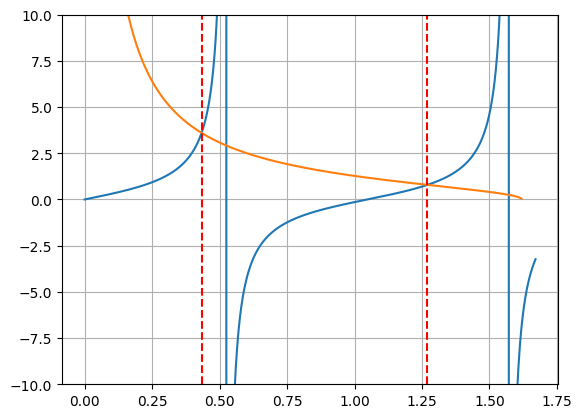

In [3]:
#even parity
V0=10.0 # eV
a=3.0 # A
m=1.0 # m_e
alpha=np.linspace(0.0, 3*np.pi/(2*a)+0.1, 1000)
beta=np.sqrt(2*m*V0/(alpha*alpha*hbar2)-1)
plt.plot(alpha,np.tan(alpha*a), label='beta')
plt.plot(alpha, beta, label='alpha')
plt.vlines((np.sqrt(2*m*0.715452497486/hbar2)), -10, 10, colors='r', linestyles='dashed', label='V0')
plt.vlines((np.sqrt(2*m*6.148644135757/hbar2)), -10, 10, colors='r', linestyles='dashed', label='V0')
plt.ylim(-10, 10)
plt.grid()


In [4]:
#using roots.cpp change the ecuation for the roots find the first root
# entrada = "0.5\n1.0\n0.3\n"  # primer valor 
entrada = "5.5\n6.1\n0.3\n"  # segundo valor 
subprocess.run(["g++", "roots.cpp", "-o", "roots"])
result = subprocess.run(["./roots"], input=entrada, capture_output=True, text=True)
print(result.stdout)

Number of iterations exceeded the limit!
nan
Bisect time: 0.000027888000 seconds
9.867203744777
False Position time: 0.000004099000 seconds
9.867203745276
Secant time: 0.000001784000 seconds



/tmp/ipykernel_27967/2669077588.py:4: RuntimeWarning: invalid value encountered in sqrt
  beta=np.sqrt(2*m*(V0-E)/hbar2)


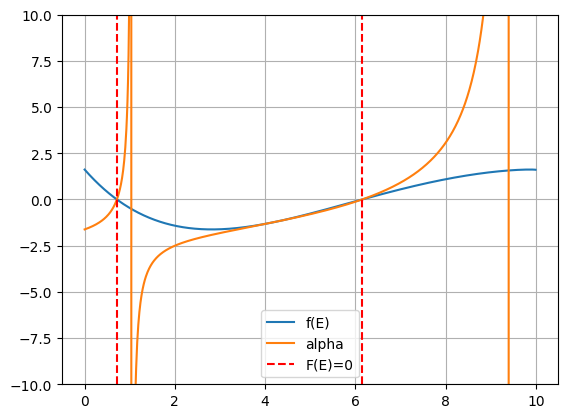

In [5]:
# for even parity
E=np.linspace(0.001, V0+2, 1000)
alpha=np.sqrt(2*m*E/hbar2)
beta=np.sqrt(2*m*(V0-E)/hbar2)
function=beta*np.cos(alpha*a)-np.sin(alpha*a)*alpha
plt.plot(E, function, label='f(E)')
plt.plot(E,alpha*np.tan(alpha*a)-beta, label='alpha')
plt.vlines(0.715452497486, -10, 10, colors='r', linestyles='dashed', label='')
plt.vlines(6.148644135755, -10, 10, colors='r', linestyles='dashed', label='F(E)=0')
plt.ylim(-10, 10)
plt.grid()
plt.legend()

/tmp/ipykernel_27967/131860622.py:6: RuntimeWarning: divide by zero encountered in divide
  beta=np.sqrt(2*m*V0/(alpha*alpha*hbar2)-1)
/tmp/ipykernel_27967/131860622.py:6: RuntimeWarning: invalid value encountered in sqrt
  beta=np.sqrt(2*m*V0/(alpha*alpha*hbar2)-1)
/tmp/ipykernel_27967/131860622.py:7: RuntimeWarning: divide by zero encountered in divide
  plt.plot(alpha,1/np.tan(alpha*a), label='beta')


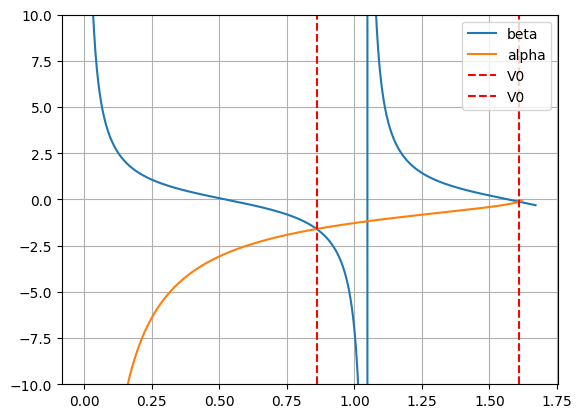

In [6]:
#odd parity
V0=10.0 # eV
a=3.0 # A
m=1.0 # m_e
alpha=np.linspace(0.0, 3*np.pi/(2*a)+0.1, 1000)
beta=np.sqrt(2*m*V0/(alpha*alpha*hbar2)-1)
plt.plot(alpha,1/np.tan(alpha*a), label='beta')
plt.plot(alpha, -beta, label='alpha')
plt.vlines((np.sqrt(2*m*2.821391864752/hbar2)), -10, 10, colors='r', linestyles='dashed', label='V0')
plt.vlines((np.sqrt(2*m*9.867203745991/hbar2)), -10, 10, colors='r', linestyles='dashed', label='V0')
plt.ylim(-10, 10)
plt.grid()
plt.legend()


In [7]:
#using roots.cpp change the ecuation for the roots odd find the first root
entrada = "2.5\n3.5\n0.3\n"  # primer valor 
# entrada = "9.5\n10.1\n0.3\n"  # segundo valor 
print("Valor de energia en los que la funcion de onda encuentra soluciones")
subprocess.run(["g++", "roots.cpp", "-o", "roots"])
result = subprocess.run(["./roots"], input=entrada, capture_output=True, text=True)
print(result.stdout)

Valor de energia en los que la funcion de onda encuentra soluciones
2.821391864680
Bisect time: 0.000028344000 seconds
2.821391864365
False Position time: 0.000006725000 seconds
2.821391864752
Secant time: 0.000001477000 seconds



/tmp/ipykernel_27967/2511726977.py:4: RuntimeWarning: invalid value encountered in sqrt
  beta=np.sqrt(2*m*(V0-E)/hbar2)


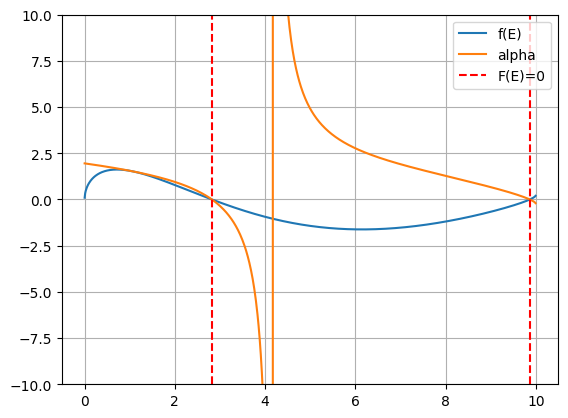

In [8]:
# for even parity
E=np.linspace(0.001, V0+2, 1000)
alpha=np.sqrt(2*m*E/hbar2)
beta=np.sqrt(2*m*(V0-E)/hbar2)
function=alpha*np.cos(alpha*a)+np.sin(alpha*a)*beta
plt.plot(E, function, label='f(E)')
plt.plot(E,alpha*1/np.tan(alpha*a)+beta, label='alpha')
plt.vlines(2.821391864752, -10, 10, colors='r', linestyles='dashed', label='')
plt.vlines(9.867203745991, -10, 10, colors='r', linestyles='dashed', label='F(E)=0')
plt.ylim(-10, 10)
plt.grid()
plt.legend()

look the integral of psi(x) is equal to 1 1.0
look the integral of psi(x) is equal to 1 0.9999999999999999
look the integral of psi(x) is equal to 1 0.9999999999999999
look the integral of psi(x) is equal to 1 0.9999999999999998


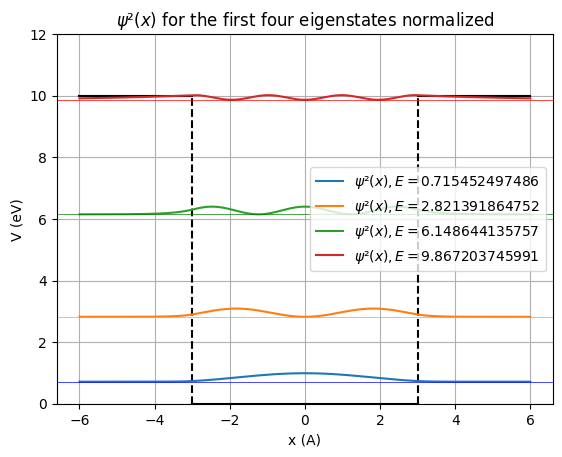

In [32]:
#visulization of the  roots and the function
prt1 = np.linspace(-2*a, -1*a, 100)
prt2 = np.linspace(-1*a, 1*a, 100)
prt3 = np.linspace(1*a, 2*a, 100)
plt.plot(prt1, np.ones_like(prt1)*V0, 'black', label='')
plt.plot(prt2, np.ones_like(prt1)*0, 'black', label='')
plt.plot(prt3, np.ones_like(prt1)*V0, 'black', label='')
plt.vlines(-a, 0, V0, colors='black', linestyles='dashed')
plt.vlines(a, 0, V0, colors='black', linestyles='dashed')

E_values = [0.715452497486, 2.821391864752, 6.148644135757, 9.867203745991]

for n,j in enumerate(E_values):
    alpha = np.sqrt(2*m*j/hbar2)
    beta = np.sqrt(2*m*(V0-j)/hbar2)
    # Espacio
    x = np.linspace(-2*a, 2*a, 1000)
    psi = np.zeros_like(x)
    if n%2==0:  # even parity
        for i, xi in enumerate(x):
            if abs(xi)<= a:
                psi[i] = np.cos(alpha*xi)
            else:
                psi[i] = np.cos(alpha * a) * np.exp(-beta * (abs(xi) - a))
    else:  # odd parity
        for i, xi in enumerate(x):
            if abs(xi) <= a:
                psi[i] = np.sin(alpha * xi)
            else:
                psi[i] = np.sign(xi)*np.sin(alpha*a) * np.exp(-beta * (abs(xi) - a))
    norm = np.sqrt(np.trapezoid(np.abs(psi)**2, x))
    psi /= norm  # Normalization
    print("look the integral of psi(x) is equal to 1",np.trapezoid(np.abs(psi)**2, x))
    plt.plot(x, psi*psi+j, label=rf"$ \psi ²(x),E= {j}$")

plt.axhline(E_values[0], color='b', lw=0.5)
plt.axhline(E_values[2], color='g', lw=0.5)
plt.axhline(E_values[1], color='orange', lw=0.5)
plt.axhline(E_values[3], color='r', lw=0.5)
plt.ylim(0, 12)
plt.xlabel('x (A)')
plt.ylabel('V (eV)')
plt.title(rf"$ \psi ²(x) $ for the first four eigenstates normalized")
plt.grid()
plt.legend()

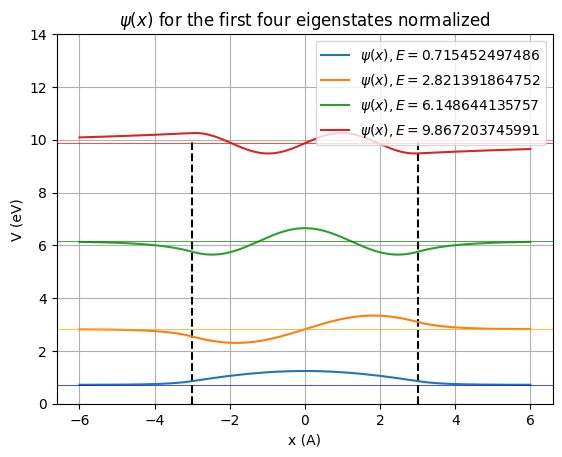

In [37]:

plt.vlines(-a, 0, V0, colors='black', linestyles='dashed')
plt.vlines(a, 0, V0, colors='black', linestyles='dashed')
for n,j in enumerate(E_values):
    alpha = np.sqrt(2*m*j/hbar2)
    beta = np.sqrt(2*m*(V0-j)/hbar2)
    # Espacio
    x = np.linspace(-2*a, 2*a, 1000)
    psi = np.zeros_like(x)
    if n%2==0:  # even parity
        for i, xi in enumerate(x):
            if abs(xi) <= a:
                psi[i] = np.cos(alpha * xi)
            else:
                psi[i] = np.cos(alpha * a) * np.exp(-beta * (abs(xi) - a))
    else:  # odd parity
        # Espacio   
        for i, xi in enumerate(x):
            if abs(xi) <= a:
                psi[i] = np.sin(alpha * xi)
            else:
                psi[i] = np.sign(xi)*np.sin(alpha*a) * np.exp(-beta * (abs(xi) - a))
    norm = np.sqrt(np.trapezoid(np.abs(psi)**2, x))
    psi /= norm
    plt.plot(x, psi+j, label=rf"$ \psi(x),E= {j}$")

plt.axhline(E_values[0], color='blue', lw=0.5)
plt.axhline(E_values[2], color='g', lw=0.5)
plt.axhline(E_values[1], color='orange', lw=0.5)
plt.axhline(E_values[3], color='r', lw=0.5)
plt.ylim(0, 14)
plt.xlabel('x (A)')
plt.ylabel('V (eV)')
plt.title(rf"$ \psi(x) $ for the first four eigenstates normalized")
plt.grid()
plt.legend()